### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
total_tienda1 = sum(tienda1['Precio'])    #sumo la columna de precios para cada tienda
total_tienda2 = sum(tienda2['Precio'])
total_tienda3 = sum(tienda3['Precio'])
total_tienda4 = sum(tienda4['Precio'])

ventas = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']

print(ventas)


[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


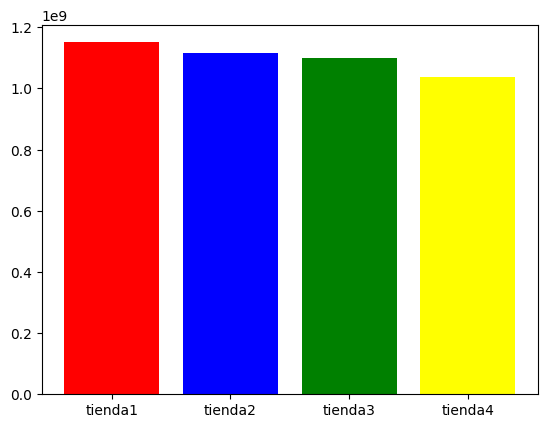

In [6]:
import matplotlib.pyplot as plt
plt.bar(tiendas, ventas, color=['red', 'blue', 'green', 'yellow'])
plt.show()

# 2. Ventas por categoría

In [28]:
#  Comencé calculando la cantidad de productos tienda por tienda  #
#  y me dí cuenta que podría hacer una función e iterar sobre     #
#  cada tienda al incluirlas en un diccionario.                   #

conteo1 = {}

for venta in tienda1.to_dict('records'):        #itero sobre cada linea de la tabla, convirtiendo en listas de diccionarios
  categoria = venta['Categoría del Producto']   #Extraigo la categoría del producto
  if categoria in conteo1:
    conteo1[categoria] += 1                      #Actualizo la cantidad de productos para esa categoría
  else:
    conteo1[categoria] = 1                       #Creo una nueva entrada para la categoía que todavía no había sido leída

print(conteo1)


conteo2 = {}

for venta in tienda2.to_dict('records'):
  categoria = venta['Categoría del Producto']
  if categoria in conteo2:
    conteo2[categoria] += 1
  else:
    conteo2[categoria] = 1

print(conteo2)


conteo3 = {}

for venta in tienda3.to_dict('records'):
  categoria = venta['Categoría del Producto']
  if categoria in conteo3:
    conteo3[categoria] += 1
  else:
    conteo3[categoria] = 1

print(conteo3)


conteo4 = {}

for venta in tienda4.to_dict('records'):
  categoria = venta['Categoría del Producto']
  if categoria in conteo4:
    conteo4[categoria] += 1
  else:
    conteo4[categoria] = 1

print(conteo4)


{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}
{'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}
{'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}
{'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}


In [30]:
#  Código mejorado usando la función contar_categorías  #


def contar_categorias(tienda):
    conteo = {}
    for venta in tienda.to_dict('records'):
        categoria = venta['Categoría del Producto']
        if categoria in conteo:
            conteo[categoria] += 1
        else:
            conteo[categoria] = 1
    return conteo


#  Creo un diccionario para iterar sobre las tiendas  #
tiendas = {'Tienda 1': tienda1,'Tienda 2': tienda2,'Tienda 3': tienda3,'Tienda 4': tienda4}

#  Creo un diccionario con los resulytados  #
resultados = {nombre: contar_categorias(datos) for nombre, datos in tiendas.items()}

#  Visualizo los datos  #
print(resultados)
print("----------------------------------------------")
for tienda, conteo in resultados.items():
    print(f"\n{tienda}:")
    for categoria, cantidad in conteo.items():
        print(f"  {categoria}: {cantidad} productos")

{'Tienda 1': {'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}, 'Tienda 2': {'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}, 'Tienda 3': {'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}, 'Tienda 4': {'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}}
----------------------------------------------

Tienda 1:
  Electrónicos: 448 productos
  Muebles: 465 productos
  Juguetes: 324 productos
  Electrodomésticos: 312 productos
  Artículos para el h

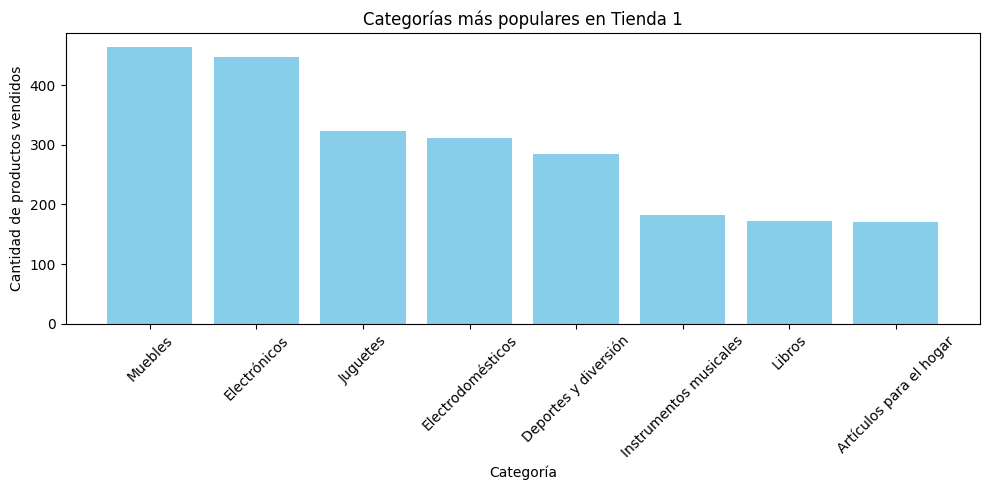

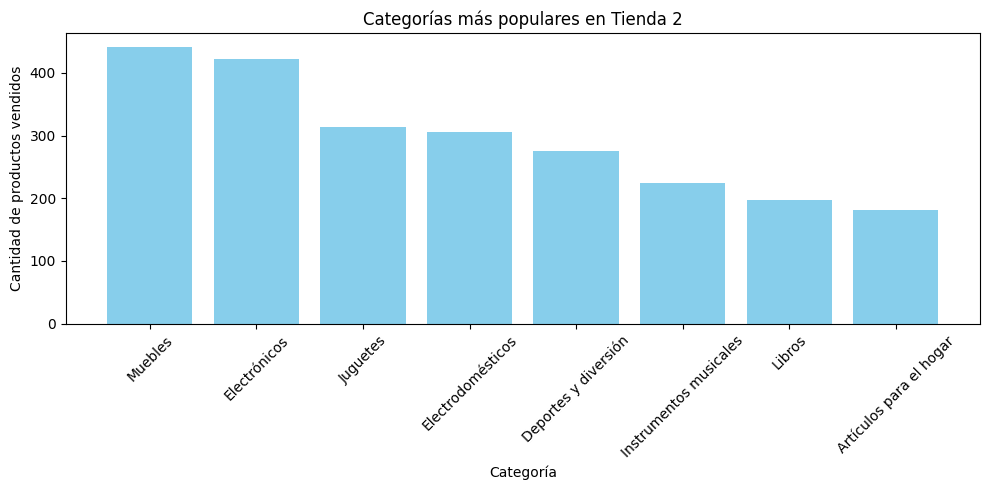

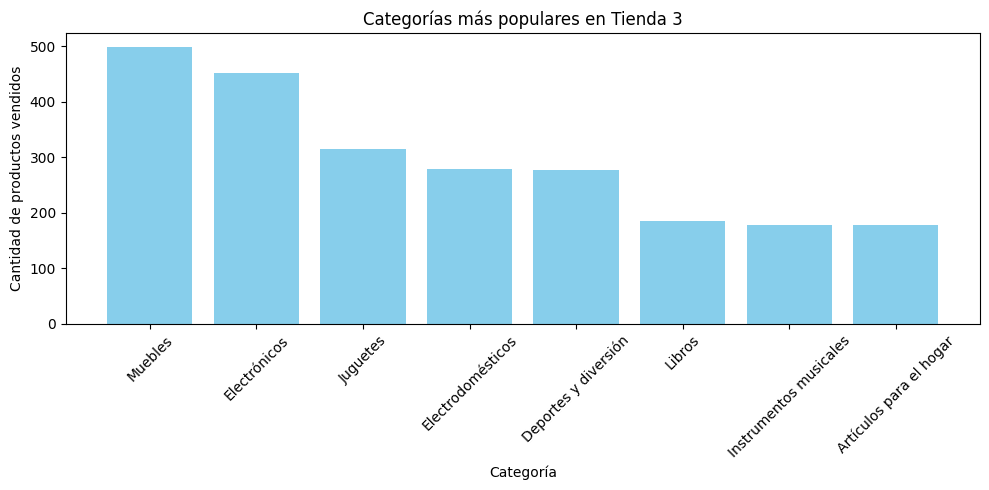

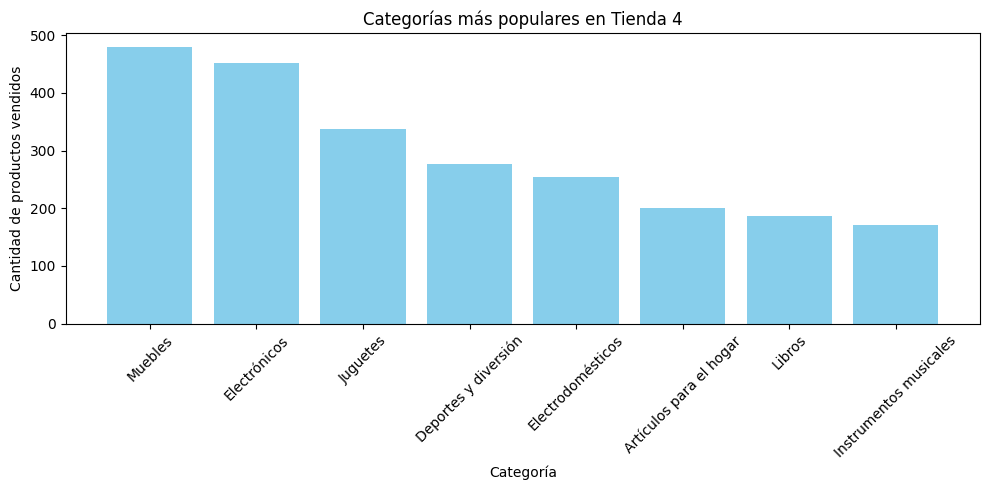

In [33]:
import matplotlib.pyplot as plt

for tienda, categorias in resultados.items():
    # Ordeno categorías por cantidad (de mayor a menor)
    categorias_ordenadas = sorted(categorias.items(), key=lambda x: x[1], reverse=True)
    nombres = [cat[0] for cat in categorias_ordenadas]
    valores = [cat[1] for cat in categorias_ordenadas]

    # Creo el gráfico
    plt.figure(figsize=(10, 5))
    plt.bar(nombres, valores, color='skyblue')
    plt.title(f'Categorías más populares en {tienda}')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de productos vendidos')
    plt.xticks(rotation=45)  #para que no se solapen los nombres de las categorías
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda